# CNN_Image Classification01(컨볼루션 신경망을 사용한 이미지 분류)
  
###### 2024-3-08 KH.LIM @Cheongju MyHappyHome
###### 신경망 교과서 참조
###### over96@naver.com

컨볼루션 신경망을 이용해서 개와 고양이를 분류하는 프로젝트  
old한 프로젝트이지만 기초를 이해하기 위해 중요한 과정

In [1]:
!pip install piexif

## 사물 인식 기술 유형
이미지분류-Image Classification  
사물 탐지-Detect  
이미지 분할 - Image segmentation  

## CNN의 빌딩블록
이미지의 특징을 학습하기 위해 Convolution(합성곱) 신경망 이용

### 필터링과 컨볼루션
이미지 위에서 필터를 조금씩 움직이면서 모든 화소에 필터를 적용하면 이미지의 특징을 찾을 수 있다.  
이 과정을 컨볼루션이라고 한다. 

### 최대 풀링(max pooling)
컨볼루션 레이어 결과의 가중치 개수를 줄여서 모델 복잡도 감소시킴, 과적합 방지


## CNN의 기본 아키텍처
입력레이어 - 컨볼류션레이어-풀링레이어-컨볼루션레이어-풀링레이어-완전연결레이어-완전연결레이어-출력레이어  
컨볼루션레이어는 보통 ReLU함수 사용, 완전연결레이어는 이진분류일 경우 시그모이드 다중클래스 분류일때는 소프트맥스 함수를 사용한다.  
좌측에 배치한 컨볼루션레이어층은 이미지 내 특징을 식별하는 역할을 하며, 우측에 위치한 완전 연결 레이어는 최종 분류를 담당한다.

## CNN아키텍처
LeNet(1988) : 필기인신 강점 증명 
AlexNet(2012) : 매개변수 6000만개  
VGG16(2014) : 3x3 컨볼루션 필터 사용  
Inception(2014) : 정확도를 유지하면서 훈련 시간을 개선  
ResNet(2015) : 잔차 블록 기술, 매개변수 개수를 적절히 유지하면서 신경망 깊이를 늘릴 수 있다.  

## 고양이 개 이미지 데이터셋
마이크로소프트 제공한 데이터셋

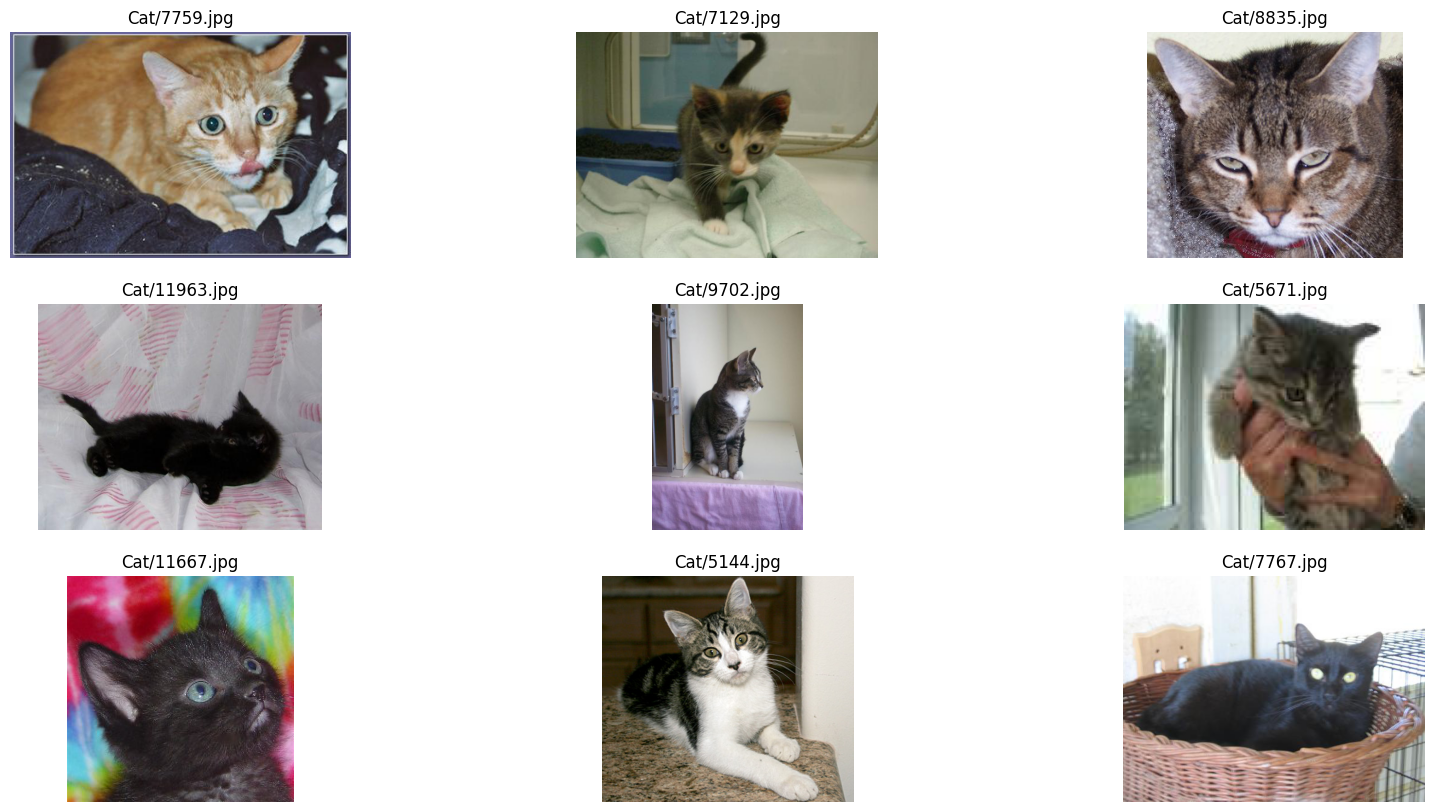

In [2]:
from matplotlib import pyplot as plt
import os
import random

# 고양이 이미지 출력
# 파일명 리스트 가져오기
_, _, cat_images = next(os.walk('../DeeplearningTextbook/data4/PetImages/Cat'))

# 가로 세 개, 세로 세 개(총 아홉 개)짜리 차트를 준비
fig, ax = plt.subplots(3,3, figsize=(20,10))

# 무작위로 선택한 이미지로 차트를 구성
for idx, img in enumerate(random.sample(cat_images, 9)):
    img_read = plt.imread('../DeeplearningTextbook/data4/PetImages/Cat/'+img)
    ax[int(idx/3), idx%3].imshow(img_read)
    ax[int(idx/3), idx%3].axis('off')
    ax[int(idx/3), idx%3].set_title('Cat/'+img)

plt.show()

                                

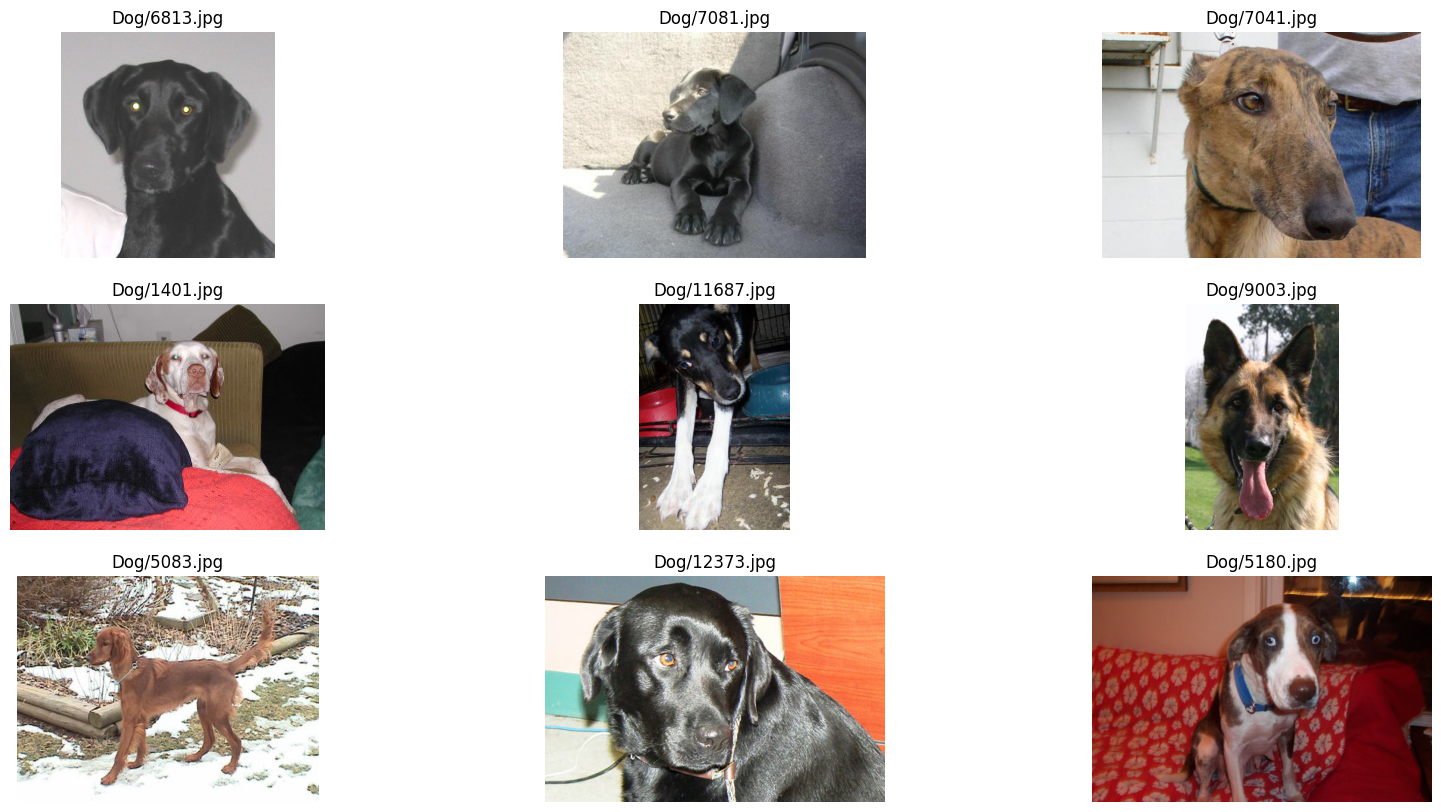

In [3]:
# 개 이미지 출력
# 파일명 리스트 가져오기
_, _, cat_images = next(os.walk('../DeeplearningTextbook/data4/PetImages/Dog'))

# 가로 세 개, 세로 세 개(총 아홉 개)짜리 차트를 준비
fig, ax = plt.subplots(3,3, figsize=(20,10))

# 무작위로 선택한 이미지로 차트를 구성
for idx, img in enumerate(random.sample(cat_images, 9)):
    img_read = plt.imread('../DeeplearningTextbook/data4/PetImages/Dog/'+img)
    ax[int(idx/3), idx%3].imshow(img_read)
    ax[int(idx/3), idx%3].axis('off')
    ax[int(idx/3), idx%3].set_title('Dog/'+img)

plt.show()

## 케라스 이미지 데이터 다루기
컴퓨터 메모리 부족문제를 해결하기위해 flow_from_directory 메서드 사용  
이 메서드는 이미지 폴더에 있는 데이터를 필요한 만큼 일정 크기로 나눠 메모리에 로드하는 기능  
메서드에 추가 인자를 전달하면 이미지 크기 조절이나 다양한 증강 기법 적용할 수 있음.  
flow_from_directory 메서드를 사용하기 위해서는 데이터셋 디렉터리를 정해긴 규칙으로 만들어 줘야 함.   
/data
    .../train
        .../cat
            ...0.jpg
            ...1.jpg
        .../dog
            ...0.jpg
    .../test
        .../cat    

In [4]:
# 이미지 데이터 분리해서 신규폴더로 옮기기

from utils import train_test_split

src_folder = '../DeeplearningTextbook/data4/PetImages/'
train_test_split(src_folder)

In [5]:
# 새로운 폴더에 이미지가 잘 옮겨졌는지 갯수확인하기

import os

def count_files_in_folders(folder_paths):
    for folder_path in folder_paths:
        try:
            # 해당 폴더 내의 파일 목록을 얻어옵니다.
            files = os.listdir(folder_path)
            # 파일의 개수를 출력합니다.
            print(f"폴더 '{folder_path}' 내에는 {len(files)}개의 파일이 있습니다.")
        except FileNotFoundError:
            print(f"폴더 '{folder_path}'를 찾을 수 없습니다.")
        except PermissionError:
            print(f"폴더 '{folder_path}'에 접근할 권한이 없습니다.")

# 테스트할 폴더들의 경로를 리스트로 지정합니다.
folder_paths = ["../DeeplearningTextbook/data4/PetImages/Test/Cat", "../DeeplearningTextbook/data4/PetImages/Test/Dog",
                "../DeeplearningTextbook/data4/PetImages/Train/Cat", "../DeeplearningTextbook/data4/PetImages/Train/Dog"]
count_files_in_folders(folder_paths)

폴더 '../DeeplearningTextbook/data4/PetImages/Test/Cat' 내에는 2500개의 파일이 있습니다.
폴더 '../DeeplearningTextbook/data4/PetImages/Test/Dog' 내에는 2500개의 파일이 있습니다.
폴더 '../DeeplearningTextbook/data4/PetImages/Train/Cat' 내에는 9998개의 파일이 있습니다.
폴더 '../DeeplearningTextbook/data4/PetImages/Train/Dog' 내에는 9999개의 파일이 있습니다.


## 이미지 증강
케라스에서는 ImageDatagenerator 클래스를 이용해 이미지 증강 기법을 적용할 수 있다.  
클래스 객체 생성


1025.jpg


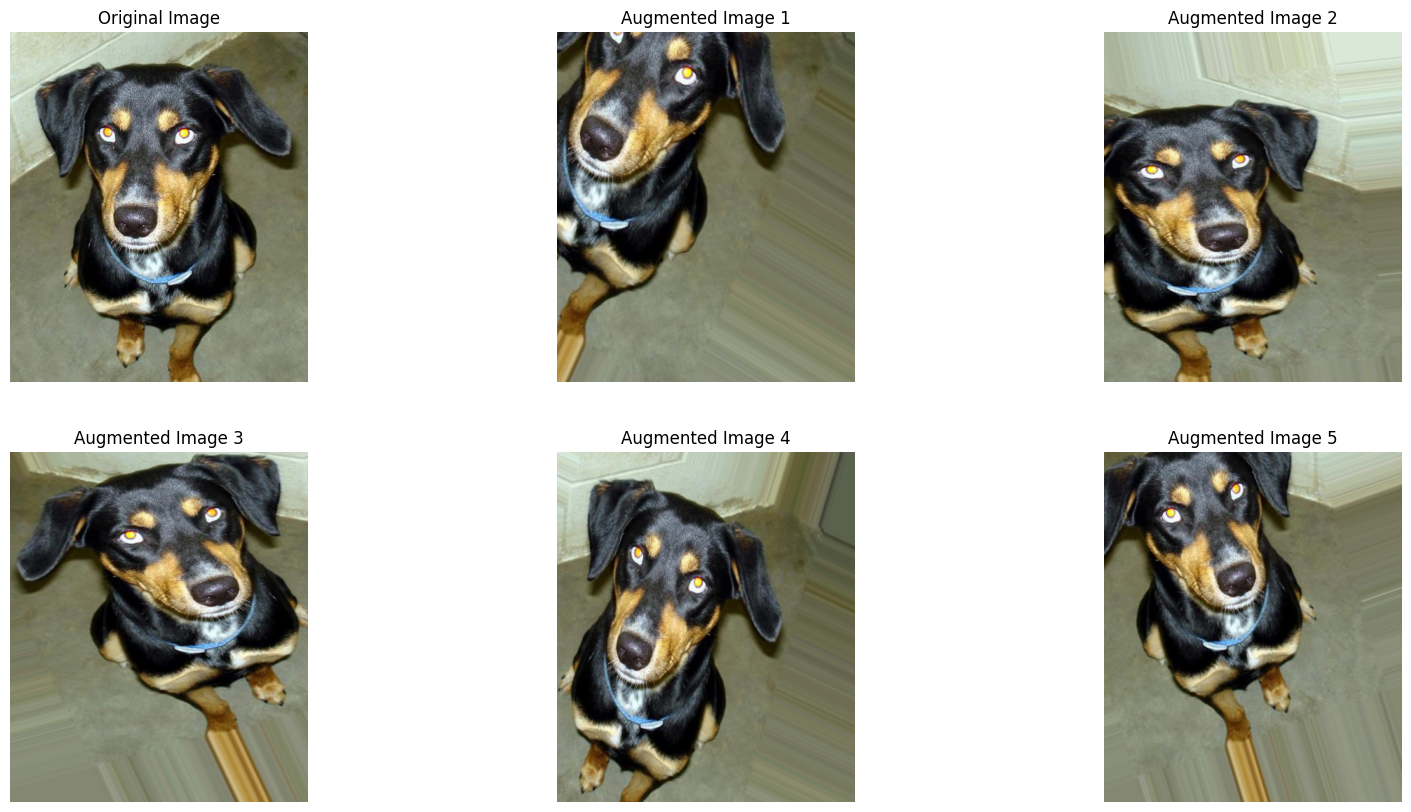

In [6]:
from keras.preprocessing.image import ImageDataGenerator

image_generator = ImageDataGenerator(rotation_range = 30,
                                     width_shift_range = 0.2,
                                     height_shift_range = 0.2,
                                     zoom_range = 0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')

# 기존 이미지를 얼마나 변형할지 클래스에 몇 가지 인자를 전달한다.   
# 이 클래스를 사용해 Train/Dog 폴더에서 무작위 이미지를 선택하고 증강기법을 적용해서 출력해보자

fig, ax = plt.subplots(2,3, figsize=(20,10))
all_images = []

_, _, dog_images = next(os.walk('../DeeplearningTextbook/data4/PetImages/Train/Dog/'))
random_img = random.sample(dog_images, 1)[0]
print(random_img)
random_img = plt.imread('../DeeplearningTextbook/data4/PetImages/Train/Dog/'+random_img)
all_images.append(random_img)

random_img = random_img.reshape((1,) + random_img.shape)
sample_augmented_images = image_generator.flow(random_img)

for _ in range(5):
	augmented_imgs = sample_augmented_images.next()
	for img in augmented_imgs:
		all_images.append(img.astype('uint8'))

for idx, img in enumerate(all_images):
	ax[int(idx/3), idx%3].imshow(img)
	ax[int(idx/3), idx%3].axis('off')
	if idx == 0:
		ax[int(idx/3), idx%3].set_title('Original Image')
	else:
		ax[int(idx/3), idx%3].set_title('Augmented Image {}'.format(idx))


plt.show()


In [7]:
# 새로운 폴더에 이미지가 잘 옮겨졌는지 갯수확인하기

import os

def count_files_in_folders(folder_paths):
    for folder_path in folder_paths:
        try:
            # 해당 폴더 내의 파일 목록을 얻어옵니다.
            files = os.listdir(folder_path)
            # 파일의 개수를 출력합니다.
            print(f"폴더 '{folder_path}' 내에는 {len(files)}개의 파일이 있습니다.")
        except FileNotFoundError:
            print(f"폴더 '{folder_path}'를 찾을 수 없습니다.")
        except PermissionError:
            print(f"폴더 '{folder_path}'에 접근할 권한이 없습니다.")

# 테스트할 폴더들의 경로를 리스트로 지정합니다.
folder_paths = ["../DeeplearningTextbook/data4/PetImages/Test/Cat", "../DeeplearningTextbook/data4/PetImages/Test/Dog",
                "../DeeplearningTextbook/data4/PetImages/Train/Cat", "../DeeplearningTextbook/data4/PetImages/Train/Dog"]
count_files_in_folders(folder_paths)

폴더 '../DeeplearningTextbook/data4/PetImages/Test/Cat' 내에는 2500개의 파일이 있습니다.
폴더 '../DeeplearningTextbook/data4/PetImages/Test/Dog' 내에는 2500개의 파일이 있습니다.
폴더 '../DeeplearningTextbook/data4/PetImages/Train/Cat' 내에는 9998개의 파일이 있습니다.
폴더 '../DeeplearningTextbook/data4/PetImages/Train/Dog' 내에는 9999개의 파일이 있습니다.


Train이미지가 충분하기 때문에 이미지 증강은 하지 않고 진행

## 모델 구성
두 가지 방식으로 모델을 만든다.   
첫 번째는 비교적 단순한 형태의 CNN 구조를 만든어보고  
두 번째는 VGG16을 활용해 모델을 만들어 본다. 즉 미리 학습된 VGG16모델을 가져와 이미지를 분류할 수 있도록 바꾼다.

### 첫번째 단순한 형태의 기본CNN
입력레이어 - 컨볼루션레이어-최대풀링-컨볼루션레이어-최대풀링-완전연결-완전열결-출력레이어

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

model = Sequential()

컨볼루션 레이어 추가하기 전에 초매개변수 설정  
필터크기 : 가로3, 세로3  
필터 개수 : 32개  
입력 이미지 크기 : 가로32pixel, 세로32pixel  
최대 풀링 크기 : 일반적으로 가로2, 세로2  
배치사이즈 : 64  
에폭당 반복 수 : 각 에폭당 훈련 박복 횟수를 지정한다. 일반적으로 훈련 데이터셋 개수를 배치사이즈로 나눈 값을 사용  20000//배치사이즈  
에폭 횟수 : 30

In [15]:
# 초매개변수 정의
FILTER_SIZE = 3
NUM_FILTERS = 32
INPUT_SIZE  = 32
MAXPOOL_SIZE = 2
BATCH_SIZE = 64
STEPS_PER_EPOCH = 20000//BATCH_SIZE
EPOCHS = 10

In [16]:
# 컨볼루션 레이어 추가
model = Sequential()
model.add(Conv2D(NUM_FILTERS, (FILTER_SIZE, FILTER_SIZE), input_shape = (INPUT_SIZE, INPUT_SIZE, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (MAXPOOL_SIZE, MAXPOOL_SIZE)))

model.add(Conv2D(NUM_FILTERS, (FILTER_SIZE, FILTER_SIZE), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (MAXPOOL_SIZE, MAXPOOL_SIZE)))

# 1차원 벡터로 변환. 예를 들어 형태(shape)가 (5,5,3)인 벡터를 Flatten 함수에 전달하면 형태가 (75)인 벡터로 반환
model.add(Flatten())
model.add(Dense(units = 128, activation = 'relu'))

# Dropout 레이어는 입력값 중 일정 비율을 무작위로 골라 0으로 만든다. 이는 모델이 특정 가중치에 치중하는 걸 막아 과적합을 줄이는 효과가 있다.
model.add(Dropout(0.5))
model.add(Dense(units = 1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [17]:
# 모델 훈련

training_data_generator = ImageDataGenerator(rescale = 1./255)

training_set = training_data_generator.flow_from_directory('../DeeplearningTextbook/data4/PetImages/Train/',
                                                target_size = (INPUT_SIZE, INPUT_SIZE),
                                                batch_size = BATCH_SIZE,
                                                class_mode = 'binary')

model.fit_generator(training_set, steps_per_epoch = STEPS_PER_EPOCH, epochs = EPOCHS, verbose=1)


Found 19997 images belonging to 2 classes.
Epoch 1/10


C:\Users\AI-space\AppData\Local\Temp\ipykernel_3784\3179223141.py:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(training_set, steps_per_epoch = STEPS_PER_EPOCH, epochs = EPOCHS, verbose=1)


312/312 [==============================] - 31s 99ms/step - loss: 0.6756 - accuracy: 0.5646
Epoch 2/10
312/312 [==============================] - 31s 98ms/step - loss: 0.5899 - accuracy: 0.6864
Epoch 3/10
312/312 [==============================] - 30s 97ms/step - loss: 0.5282 - accuracy: 0.7395
Epoch 4/10
312/312 [==============================] - 30s 97ms/step - loss: 0.4899 - accuracy: 0.7687
Epoch 5/10
312/312 [==============================] - 34s 108ms/step - loss: 0.4550 - accuracy: 0.7859
Epoch 6/10
312/312 [==============================] - 31s 100ms/step - loss: 0.4338 - accuracy: 0.8002
Epoch 7/10
312/312 [==============================] - 30s 97ms/step - loss: 0.4090 - accuracy: 0.8117
Epoch 8/10
312/312 [==============================] - 30s 97ms/step - loss: 0.3940 - accuracy: 0.8222
Epoch 9/10
312/312 [==============================] - 30s 97ms/step - loss: 0.3767 - accuracy: 0.8317
Epoch 10/10
312/312 [==============================] - 30s 97ms/step - loss: 0.3628 - accur

In [18]:
# training_data_generator = ImageDataGenerator(rescale = 1./255)
testing_data_generator = ImageDataGenerator(rescale = 1./255)

# training_set = training_data_generator.flow_from_directory(src+'Train/',
#                                                 target_size = (INPUT_SIZE, INPUT_SIZE),
#                                                 batch_size = BATCH_SIZE,
#                                                 class_mode = 'binary')

test_set = testing_data_generator.flow_from_directory('../DeeplearningTextbook/data4/PetImages/Test/',
                                             target_size = (INPUT_SIZE, INPUT_SIZE),
                                             batch_size = BATCH_SIZE,
                                             class_mode = 'binary')

# model.fit_generator(training_set, steps_per_epoch = STEPS_PER_EPOCH, epochs = EPOCHS, verbose=1)

score = model.evaluate_generator(test_set, steps=100)

for idx, metric in enumerate(model.metrics_names):
    print("{}: {}".format(metric, score[idx]))

Found 5000 images belonging to 2 classes.


C:\Users\AI-space\AppData\Local\Temp\ipykernel_3784\1571480909.py:16: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = model.evaluate_generator(test_set, steps=100)


loss: 0.45854824781417847
accuracy: 0.7879999876022339


테스트 정확도가 78.79%로 비교적 양호한 결과

### 전이학습
CNN에서는 컨볼루션 레이어와 최대 풀링 레이어 부분을 고정하고 마지막 완전 연결 에이어만 다시 학습시키면 전이 학습을 구현할 수 있다.   
즉 이미지 특징을 찾는 레이어는 기존에 학습된 가중치를 사용하는 것이고, 이미지 분류 부분만 다시 학습시키는 것이다.

In [19]:
# VGG16은 케라스에 내장되어 있다.
from keras.applications.vgg16 import VGG16

INPUT_SIZE = 128
vgg16 = VGG16(include_top=False, weights= 'imagenet', input_shape=(INPUT_SIZE, INPUT_SIZE, 3))

VGG16모델을 생성할 때 include_top = False라고 지정하면 VGG16 맨 끝에 있는 완전 연결 레이어를 로드하지 않는다. 

In [20]:
# 전이학습을 위해 VGG16모델을 처음부터 학습시키지 않는다.
for layer in vgg16.layers:
    layer.trainble = False
    
# 신경망 맨 오른쪽에 노드 1개짜리 완전 연결 레이어 추가
# VGG16은 Keras Sequential로 만들지 않아 사용법 다름
from keras.models import Model

input_ = vgg16.input
output_ = vgg16(input_)
last_layer = Flatten(name='flatten')(output_)
last_layer = Dense(1, activation='sigmoid')(last_layer)
model = Model(input_, last_layer)

# 이 코드는 케라스에 직접 레이어를 추가하는 방식이며, Sequential 클래스의 add()메서드는 이 과정을 단순화 한 것  
# 마지막 레이어만 훈련시키기 때문에 에폭은 3으로 지정


In [36]:
# 초매개변수 정의
BATCH_SIZE = 128
STEPS_PER_EPOCH = 19990//BATCH_SIZE
EPOCHS = 3

In [37]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

training_data_generator = ImageDataGenerator(rescale = 1./255)
testing_data_generator = ImageDataGenerator(rescale = 1./255)

training_set = training_data_generator.flow_from_directory('../DeeplearningTextbook/data4/PetImages/Train/',
                                                target_size = (INPUT_SIZE, INPUT_SIZE),
                                                batch_size = BATCH_SIZE,
                                                class_mode = 'binary')

test_set = testing_data_generator.flow_from_directory('../DeeplearningTextbook/data4/PetImages/Test/',
                                             target_size = (INPUT_SIZE, INPUT_SIZE),
                                             batch_size = BATCH_SIZE,
                                             class_mode = 'binary')

model.fit_generator(training_set, steps_per_epoch = STEPS_PER_EPOCH, epochs = EPOCHS, verbose=1)

Found 19997 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


C:\Users\AI-space\AppData\Local\Temp\ipykernel_3784\2666744014.py:16: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(training_set, steps_per_epoch = STEPS_PER_EPOCH, epochs = EPOCHS, verbose=1)


Epoch 1/3
156/156 [==============================] - 871s 6s/step - loss: 0.6176 - accuracy: 0.6352
Epoch 2/3
156/156 [==============================] - 867s 6s/step - loss: 0.4560 - accuracy: 0.7842
Epoch 3/3
156/156 [==============================] - 869s 6s/step - loss: 0.3017 - accuracy: 0.8707


In [38]:
# 테스트셋 정확도 확인

# score = model.evaluate_generator(test_set, steps=100)
score = model.evaluate_generator(test_set, len(test_set))


for idx, metric in enumerate(model.metrics_names):
    print("{}: {}".format(metric, score[idx]))

C:\Users\AI-space\AppData\Local\Temp\ipykernel_3784\3810240255.py:4: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = model.evaluate_generator(test_set, len(test_set))


loss: 0.3428683280944824
accuracy: 0.8503999710083008


에폭이 3회밖에 진행하지 않았음에도 85%의 정확도를 보임.  
전이학습의 효과!!

## 결과분석
어떤 이미지를 잘 분류했고, 어떤 이미지를 잘못 분류했는지 확인  
CNN 마지막 레이어에 사용한 시그모이드 활성화 함수는 예측 결과 리스트를 출력(이미지당 예측값 하나씩)  
예측값이 0이나 1에 가까우면 예측이 상당히 확실하다는 의미.  
0.5이면 모델이 예측 결과를 확신하지 못한다는 의미  
   
테스트 데이터셋의 이미지를 하나씩 모델에 전달해 클래스를 분류하고 결과를 다음 세 분류로 나누기
- 크게 맞은 결과 : 모델이 예측한 값이 0.2미만, 0.8초과
- 크게 틀린 결과 : 예측한 값이 0.2미만, 0.8초과지만 클래스를 잘못 분류한 경우
- 근소하게 틀린 결과 : 모델이 예측한 값이 0.4에서 0.6 사이이고 클래스를 잘못 분류한 경우

In [43]:
# 시각화할 테스트 데이터를 생성
test_set = testing_data_generator. \
                        flow_from_directory('../DeeplearningTextbook/data4/PetImages/Test/',
                                             target_size = (INPUT_SIZE, INPUT_SIZE),
                                             # batch_size = BATCH_SIZE,
                                             batch_size = 1,
                                             class_mode = 'binary')
strongly_wrong_idx = []
strongly_right_idx = []
weakly_wrong_idx = []

for i in range(test_set.__len__()):
    img = test_set.__getitem__(i)[0]
    pred_prob = model.predict(img)[0][0]
    pred_label = int(pred_prob > 0.5)
    actual_label = int(test_set.__getitem__(i)[1][0])
    if pred_label != actual_label and (pred_prob > 0.8 or pred_prob < 0.2): strongly_wrong_idx.append(i)
    elif pred_label != actual_label and (pred_prob > 0.4 and pred_prob < 0.6): weakly_wrong_idx.append(i)
    elif pred_label == actual_label and (pred_prob > 0.8 or pred_prob < 0.2): strongly_right_idx.append(i)
    
    # 이미지를 다 가져오면 멈춘다
    if (len(strongly_wrong_idx)>=9 and len(strongly_right_idx)>=9 and len(weakly_wrong_idx)>=9): 
        break
    

Found 5000 images belonging to 2 classes.
1/1 [==============================] - 0s 29ms/step


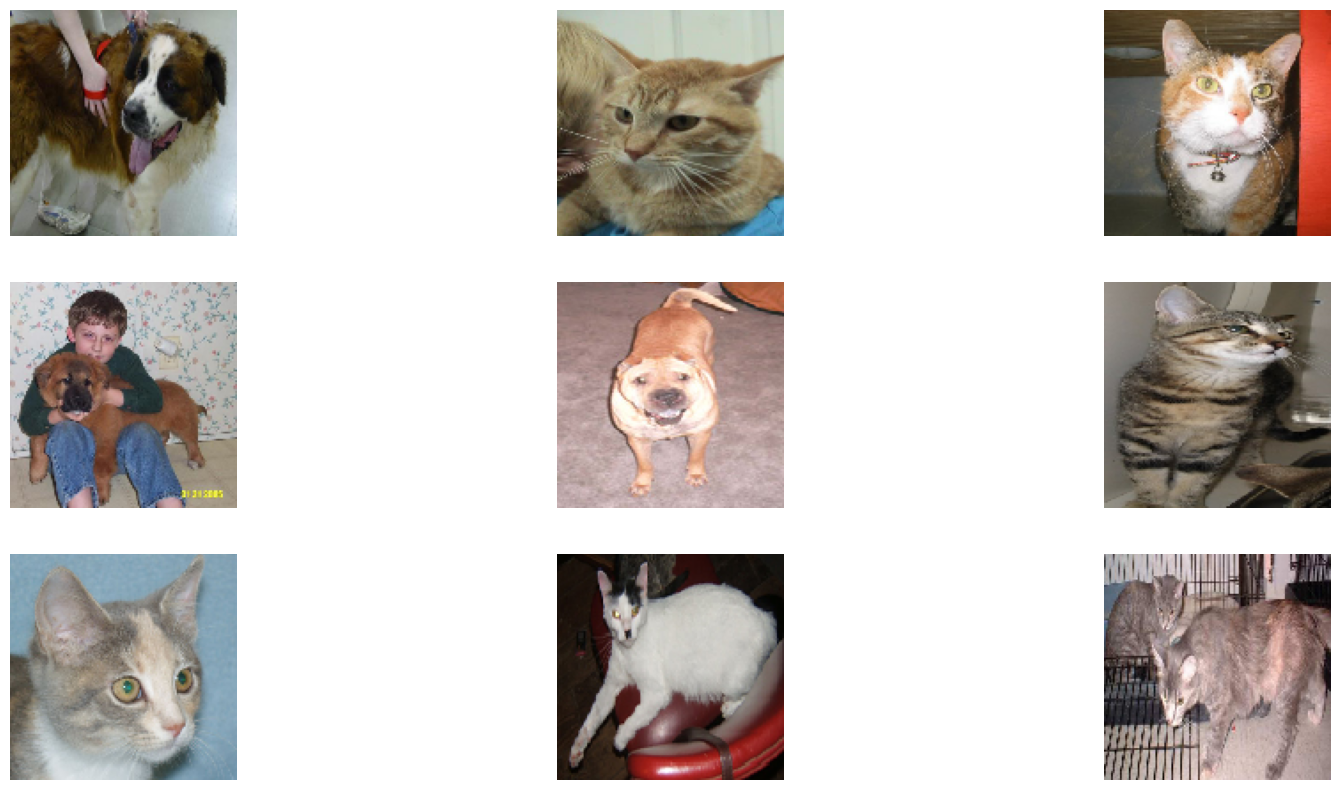

In [44]:
# 분류 이미지 출력

from matplotlib import pyplot as plt
import random 

def plot_on_grid(test_set, idx_to_plot, img_size=INPUT_SIZE):
# def plot_on_grid(test_set, idx_to_plot):

    fig, ax = plt.subplots(3,3, figsize=(20,10))
    for i, idx in enumerate(random.sample(idx_to_plot, 9)):
        img = test_set.__getitem__(idx)[0].reshape(img_size, img_size, 3)
        ax[int(i/3), i%3].imshow(img)
        ax[int(i/3), i%3].axis('off')
        
# 첫 번째 결과로,  크게 맞은 결과 중 9 개를 추출
plot_on_grid(test_set, strongly_right_idx, )
plt.show()

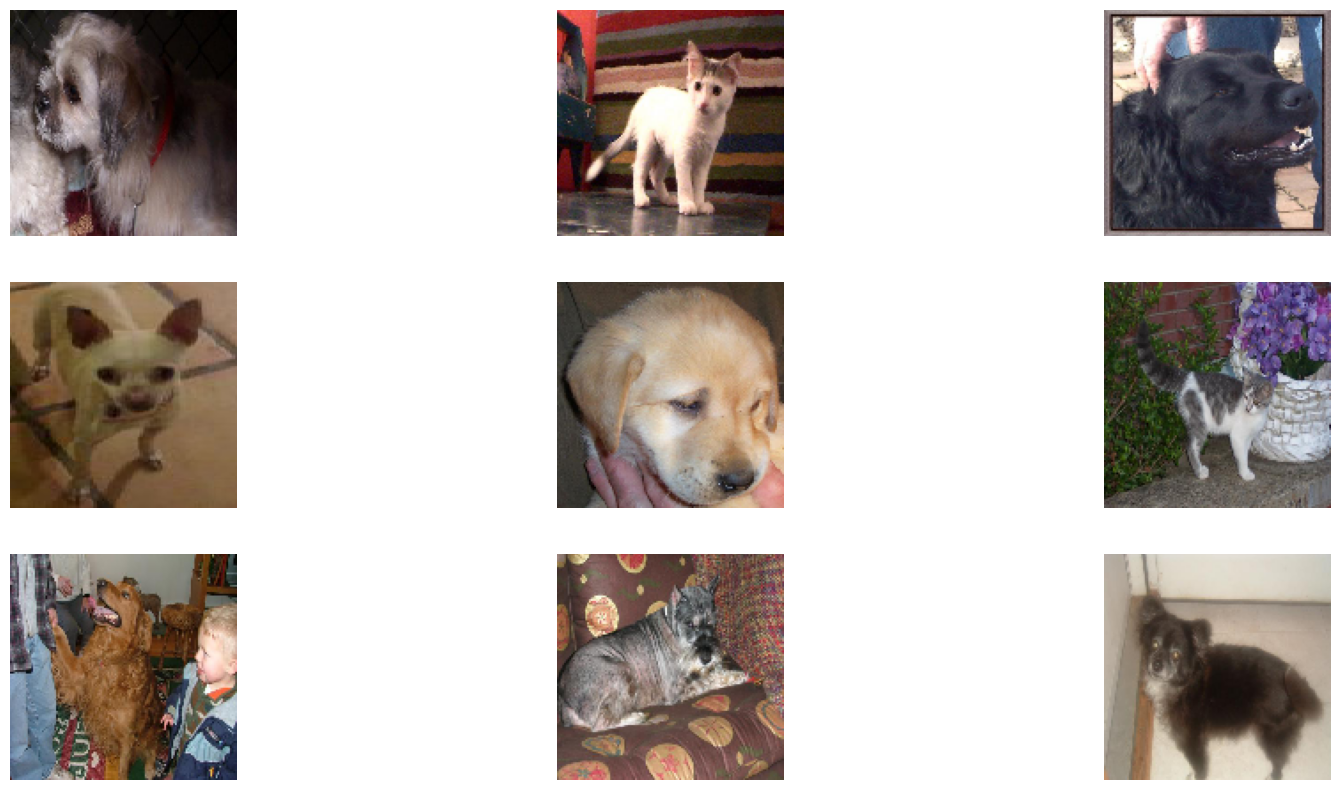

In [45]:
# 크게 틀린 결과 출력
plot_on_grid(test_set, strongly_wrong_idx)
plt.show()


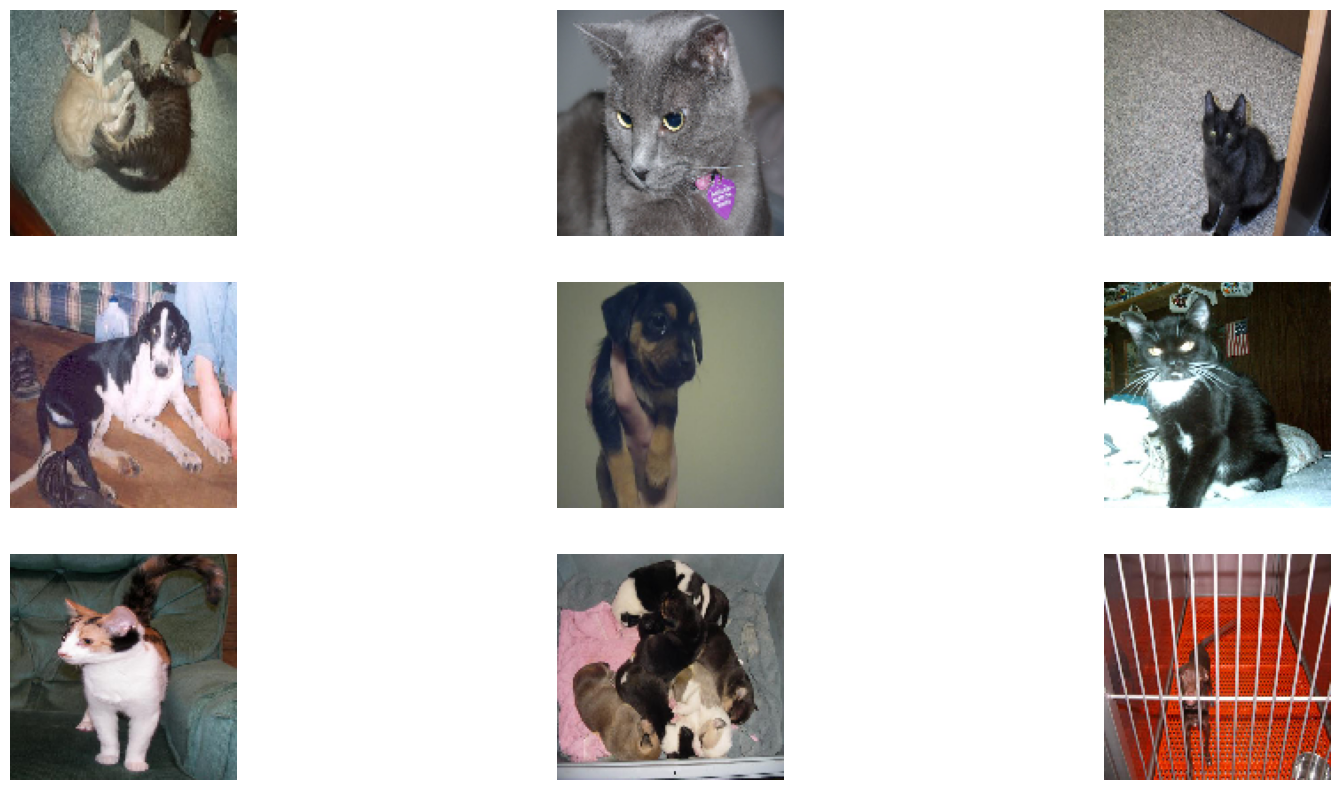

In [46]:
# 근소하게 틀린 결과 출력
plot_on_grid(test_set, weakly_wrong_idx)
plt.show()

## 마무리  
기본 CNN에는 컨볼루션과 풀링레이어를 각각 2번 사용, 그 이후 완전연결레이어 2개 연결했다.  
두 번째 VGG16 신경망을 전이 학습을 위한 모델로 활용했다.  
VGG16의 노드 1000개짜리 마지막 완전 연결 레이어를 제거하고 이진 분류를 수행하는 노드 한 개짜리 레이어로 대체하여 학습시켰다.  
학습의 반복수가 적었음에도 매우 높은 정확도를 보였다. 전이학습이 충분히 효과가 있다는 것이다.   
즉, VGG16 모델이 가지고 있는 이미지에서 피처를 찾는 필터의 파라미터는 꽤 완성도가 있다는 의미일 것이다.